In [1]:
# import smilPython 
import smilPython as sp
# functions using matplotlib to display images on jupyter notebooks
from smilPlot import *

# some paths
binDir  = "images/Bin/"
grayDir = "images/Gray/"

In [9]:
fgray = "DNA_small.png"
fgray = "chromoso.png"
# fgray = "salt.png"

img   = sp.Image(grayDir + fgray)
print(fgray + "\n------------\n", img)
# structuring element et sa taille
se   = sp.HexSE()
seSz = 4

chromoso.png
------------
 2D image
Data type: UINT8
Size: 256x256
Allocated (64KB)




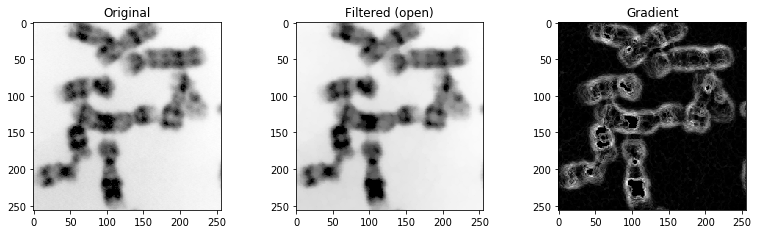

In [10]:
# Some kind of filtering on the input image
imgFilter = sp.Image(img)
sp.open(img, imgFilter, se(3))
# Gradient 
imgGrad = sp.Image(img)
sp.gradient(imgFilter, imgGrad, se(1))
smilPlot([img, imgFilter, imgGrad],
        title = ["Original", "Filtered (open)", "Gradient"])

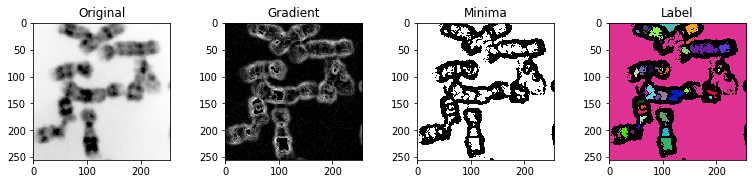

In [13]:
imgMin = sp.Image(img)
sp.hMinima(imgGrad, 15, imgMin, se())

imgLabel = sp.Image(img, 'UINT16')
sp.label(imgMin, imgLabel, se())
smilPlot([img, imgGrad, imgMin, imgLabel], 
         label = [False, False, False, True],
         title = ["Original", "Gradient", "Minima", "Label"])

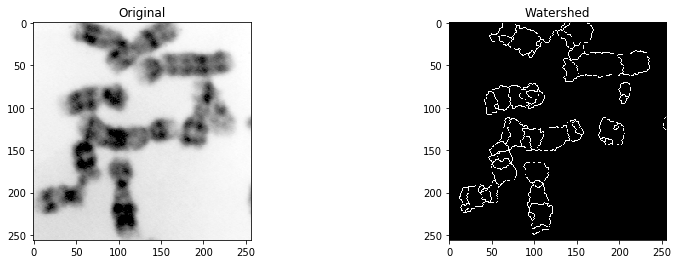

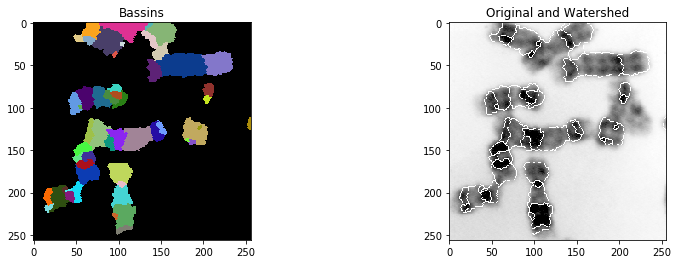

In [14]:
imgWS = sp.Image(img)
imgBas = sp.Image(imgLabel)
sp.watershed(imgGrad, imgLabel, imgWS, imgBas, se(2))
imgSup = sp.Image(img)
sp.sup(img, imgWS, imgSup)
smilPlot([img, imgWS], [False, False],
         ["Original", "Watershed"])
smilPlot([imgBas, imgSup], [True],
        title = ["Bassins", "Original and Watershed"])